# Grid_Search , Random_Forest, XGB, Ada_Boost , Hyperparameter_Tuning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#df = df.drop(['id','Unnamed: 32'], axis = 'columns')
df = df.drop(['id'], axis='columns')


In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

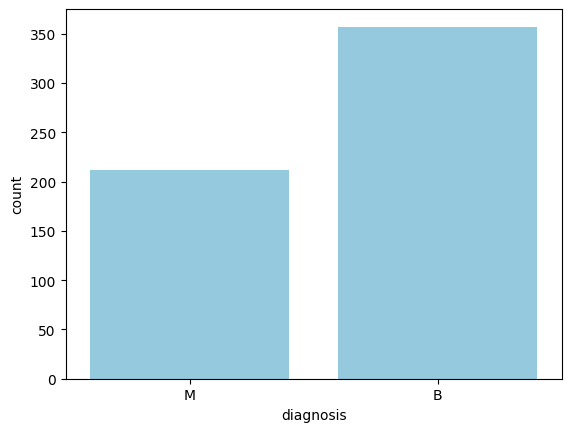

In [7]:
#sns.countplot(x='diagnosis',data=df)
sns.countplot(x='diagnosis', data=df, color='skyblue')

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

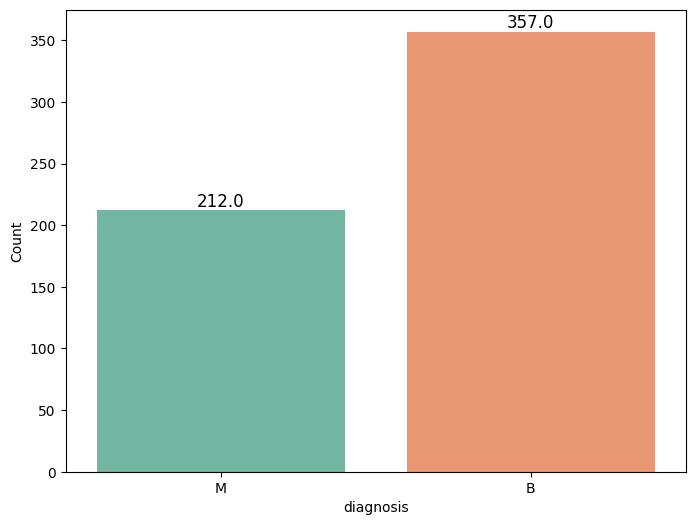

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [14]:
ytest.shape

(171, 1)

In [15]:
xtest.shape

(171, 30)

# Step 3: Decision Tree model and evaluation

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [17]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [18]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [20]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [21]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [22]:
# Define hyperparameters for Decision Tree 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Grid Search is a technique used to find the optimal hyperparameters for a machine learning model. For a Decision Tree classifier in scikit-learn, you can perform Grid Search using the GridSearchCV module.

In [23]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.03377743, 0.0067956 , 0.02838144, 0.00679593, 0.02498407,
        0.00619588, 0.02538328, 0.0063962 , 0.034378  , 0.00759568,
        0.02438488, 0.0067955 , 0.02338495, 0.00659609, 0.023385  ,
        0.00659552, 0.02318587, 0.0079946 , 0.05896254, 0.00699549,
        0.02618351, 0.00659571, 0.02538338, 0.00619612, 0.02538366,
        0.00699558, 0.02538414, 0.00619626, 0.02458501, 0.00619621,
        0.02358513, 0.00619626, 0.02338552, 0.00699553, 0.0233851 ,
        0.00639596, 0.02578392, 0.0067956 , 0.02538328, 0.00659595,
        0.02598424, 0.00639634, 0.02538385, 0.00659609, 0.02518444,
        0.00619631, 0.02458448, 0.00639625, 0.0241848 , 0.0063962 ,
        0.02338567, 0.00599637, 0.02738256, 0.00679593, 0.02578406,
        0.00819454, 0.02778306, 0.00759602, 0.02958245, 0.0069963 ,
        0.02518444, 0.00679579, 0.02518396, 0.00659618, 0.02878289,
        0.00899429, 0.02618232, 0.00719562, 0.02318535, 0.00699525,
        0.0231853 , 0.00639591,

In [25]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033777,0.008815,0.011593,0.005744,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,117
1,0.006796,0.000400,0.006796,0.000400,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,37
2,0.028381,0.003663,0.007596,0.001355,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,89
3,0.006796,0.000400,0.006196,0.000399,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9250,0.8875,0.9625,0.924051,0.962025,0.932215,0.028014,21
4,0.024984,0.002448,0.006197,0.000400,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.8875,0.9250,0.911392,0.924051,0.917089,0.016945,101


In [26]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

# Perform Grid Search for Random Forest

In [27]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [28]:
rf_grid_search.cv_results_

{'mean_fit_time': array([1.99899673e-03, 1.19881630e-03, 5.99632263e-03, 1.59983635e-03,
        1.19948387e-03, 1.59883499e-03, 1.19915009e-03, 1.19976997e-03,
        1.39899254e-03, 1.19924545e-03, 1.59912109e-03, 1.79862976e-03,
        1.19929314e-03, 1.19938850e-03, 1.19891167e-03, 1.19924545e-03,
        1.19881630e-03, 1.19934082e-03, 9.99307632e-04, 1.19934082e-03,
        1.39870644e-03, 1.19953156e-03, 9.99021530e-04, 9.99498367e-04,
        9.99450684e-04, 1.19910240e-03, 9.99116898e-04, 5.19680929e-01,
        1.01937509e+00, 1.52186656e+00, 4.96095562e-01, 9.97188473e-01,
        1.56224356e+00, 5.00892687e-01, 1.02477160e+00, 1.86316895e+00,
        7.73726034e-01, 1.63400245e+00, 3.16931481e+00, 1.85898132e+00,
        2.77964821e+00, 3.57684083e+00, 1.27412243e+00, 2.02357092e+00,
        3.52584710e+00, 9.69511223e-01, 1.88966646e+00, 2.92874446e+00,
        1.08720870e+00, 1.95587058e+00, 2.89427910e+00, 1.22167926e+00,
        2.10022173e+00, 3.08504114e+00, 1.64388

# Evaluate the optimized models

In [29]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))



Decision Tree Grid Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))



Random Forest Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Hyperparameter optimization using Randomized Search

In [31]:
# Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [32]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.01039367, 0.01159358, 0.02438493, 0.00659599, 0.02598333,
        0.02398505, 0.02598391, 0.00619621, 0.02358594, 0.0255837 ,
        0.00679564, 0.02698345, 0.03677602, 0.01119375, 0.02438488,
        0.02558308, 0.0065959 , 0.00659556, 0.0081943 , 0.00919075,
        0.00839577, 0.00679507, 0.02518435, 0.00719471, 0.00699582,
        0.00679574, 0.00739603, 0.02678375, 0.02758188, 0.02438507,
        0.00659585, 0.02678337, 0.02538428, 0.02318516, 0.02498403,
        0.00839567, 0.01019297, 0.03597703, 0.02838206, 0.01019425,
        0.03278031, 0.03078046, 0.02698216, 0.0307806 , 0.02498384,
        0.02538419, 0.02998152, 0.02518454, 0.00639629, 0.00679555,
        0.00659552, 0.00859461, 0.02898183, 0.00659571, 0.0069963 ,
        0.00659595, 0.0251843 , 0.02698369, 0.02818193, 0.02318554,
        0.00639586, 0.0227859 , 0.02858248, 0.02678299, 0.00819454,
        0.00659604, 0.00639596, 0.02338543, 0.02518458, 0.00839472,
        0.01099319, 0.00799384,

In [33]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010394,0.002059,0.010793,0.005806,random,5,2,20,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9250,0.8875,0.9125,0.898734,0.873418,0.899430,0.018133,98
1,0.011594,0.007362,0.008793,0.004259,random,2,1,10,gini,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,24
2,0.024385,0.002058,0.006996,0.001095,best,10,2,None,entropy,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9375,0.8875,0.9750,0.949367,0.936709,0.937215,0.028451,1
3,0.006596,0.000490,0.006196,0.000400,random,2,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.8875,0.8875,0.936709,0.873418,0.904525,0.027094,93
4,0.025983,0.002096,0.006596,0.001199,best,5,1,30,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,57


In [34]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [35]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [36]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.389348,5.808554e-02,0.048571,0.001020,300,5,2,log2,30,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.95,0.9625,0.949367,0.949367,0.954747,0.006335,5
1,0.901647,2.154097e-02,0.034779,0.000400,200,5,1,log2,20,gini,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.9375,0.95,0.9625,0.949367,0.924051,0.944684,0.013000,59
2,0.000999,1.168008e-07,0.000000,0.000000,300,10,4,auto,30,entropy,"{'n_estimators': 300, 'min_samples_split': 10,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
3,0.000999,2.431402e-07,0.000000,0.000000,100,10,4,auto,10,entropy,"{'n_estimators': 100, 'min_samples_split': 10,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
4,0.440930,2.688685e-02,0.020787,0.000749,100,2,4,log2,None,gini,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9375,0.95,0.9625,0.936709,0.936709,0.944684,0.010242,60


In [37]:
rf_random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [38]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Randomized Search

In [39]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision Tree

In [40]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

[Text(0.59375, 0.9166666666666666, 'concave points_mean <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3125, 0.75, 'radius_worst <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.1875, 0.5833333333333334, 'area_se <= 48.7\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.125, 0.4166666666666667, 'texture_worst <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.0625, 0.25, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.1875, 0.25, 'radius_worst <= 14.43\nentropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.5833333333333334, 'texture_worst <= 19.91\nentropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(0.375, 0.4166666666666667, 'entropy = 0.0\n

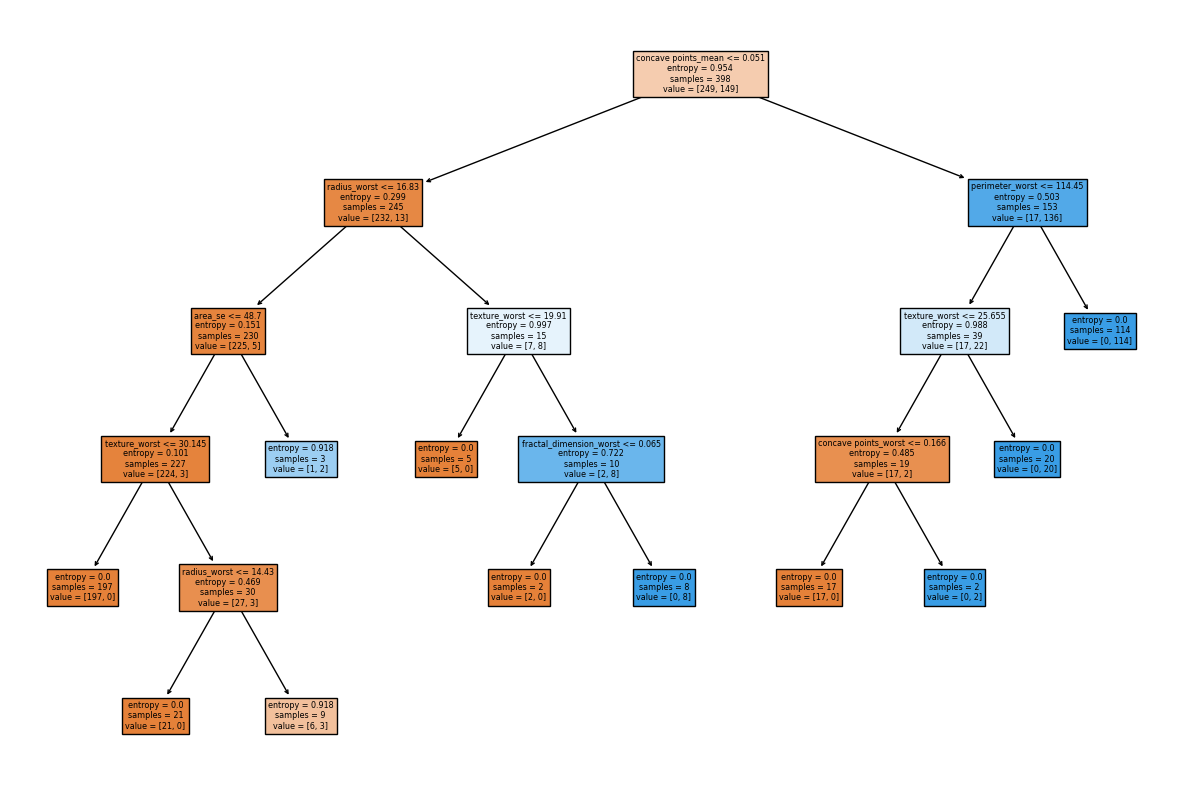

In [41]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

In [42]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [43]:
ccp_alpha_values 

array([0.        , 0.01458594, 0.0181389 , 0.01942863, 0.02249811,
       0.02254598, 0.02317526, 0.05933369, 0.07364967, 0.0966387 ,
       0.57628768])

In [44]:
clfs_list = []  # save diffrent classifiers

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    

In [45]:
clfs_list 

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014585942967809122, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [46]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [47]:
train_scores

[1.0,
 0.9597989949748744,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [48]:
test_scores

[0.9415204678362573,
 0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [49]:
import matplotlib.pyplot as plt

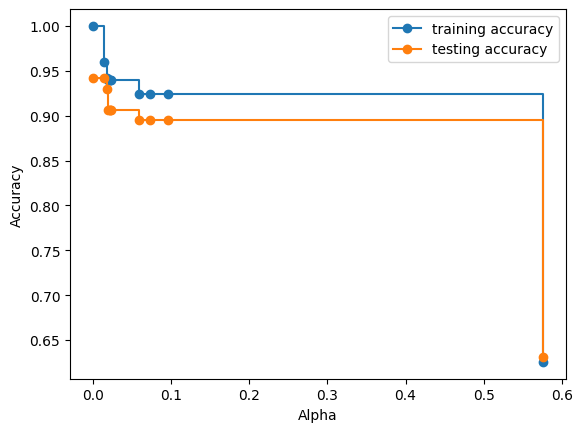

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [51]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [52]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

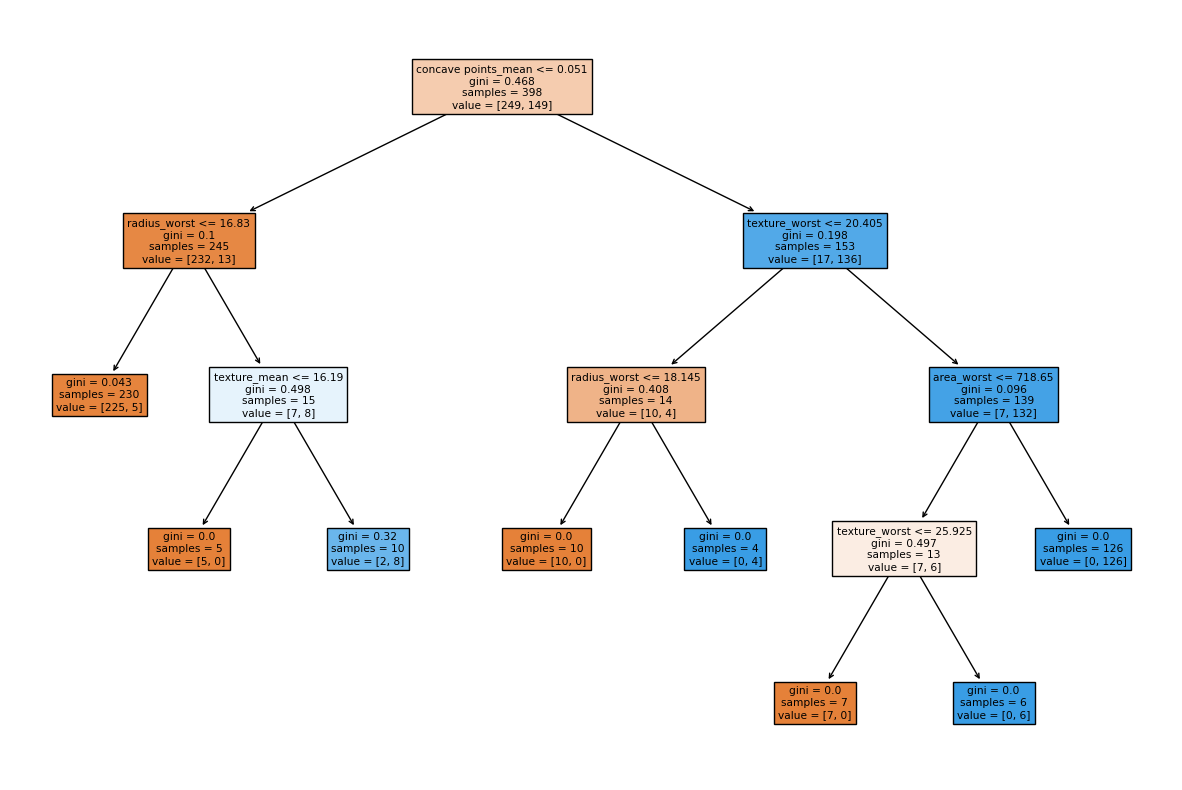

In [53]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# Pre-pruning- Apply cost-complexity pre pruning to the Random Forest using the ccp_alpha parameter

In [54]:
clf_rf= rf_random_search.best_estimator_
clf_rf

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [55]:
# best Random Forest estimator from the grid search 
best_rf_estimator = rf_grid_search.best_estimator_
     

In [56]:
# Get the number of estimators (trees) in the best Random Forest model
n_estimators = best_rf_estimator.n_estimators

In [57]:
# Create a list to store different Random Forest classifiers with different ccp_alpha values
clfs_list_rf = []

In [58]:
# Save the different ccp_alpha values from the pruning path
ccp_alpha_values_rf = pruning_path.ccp_alphas

In [59]:
# Train and save different Random Forest classifiers with different ccp_alpha values
for ccp_alpha in ccp_alpha_values_rf:
    clf_rf = RandomForestClassifier(random_state=42, n_estimators=n_estimators, ccp_alpha=ccp_alpha)
    clf_rf.fit(xtrain, ytrain)
    clfs_list_rf.append(clf_rf)

In [60]:
# Calculate training and testing scores for each classifier in the list
train_scores_rf = [clf_rf.score(xtrain, ytrain) for clf_rf in clfs_list_rf]
test_scores_rf = [clf_rf.score(xtest, ytest) for clf_rf in clfs_list_rf]

In [61]:
# Choose the best classifier based on the highest test score
import numpy as np

best_rf_index = np.argmax(test_scores_rf)
best_rf_estimator_pruned = clfs_list_rf[best_rf_index]

In [62]:
# Make predictions on the test data using the best pruned Random Forest model
y_pred_rf_pruned = best_rf_estimator_pruned.predict(xtest)

In [63]:
# Calculate accuracy score of the best pruned Random Forest model
accuracy_rf_pruned = accuracy_score(ytest, y_pred_rf_pruned)

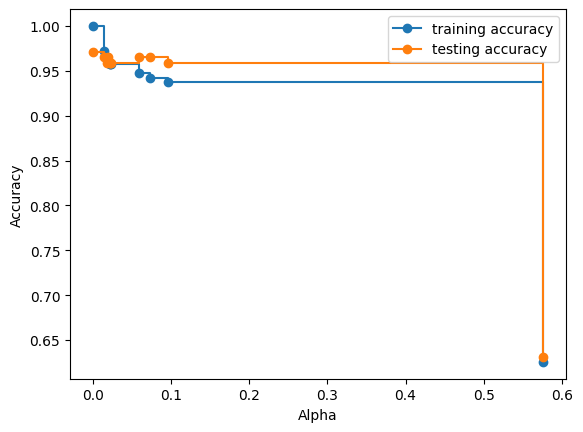

In [64]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set labels for the plot
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

# Plot the training accuracy and testing accuracy
ax.plot(ccp_alpha_values_rf, train_scores_rf, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values_rf, test_scores_rf, marker='o', label="testing accuracy", drawstyle="steps-post")

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()
     

In [65]:
# Fit the Random Forest model with the best hyperparameters on the training data
best_rf_estimator.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', random_state=42)

In [66]:
# Make predictions on the test data using the best pruned Random Forest model
y_pred_rf_pruned = best_rf_estimator.predict(xtest)

In [67]:
# Calculate accuracy score of the best pruned Random Forest model
accuracy_rf_pruned = accuracy_score(ytest, y_pred_rf_pruned)

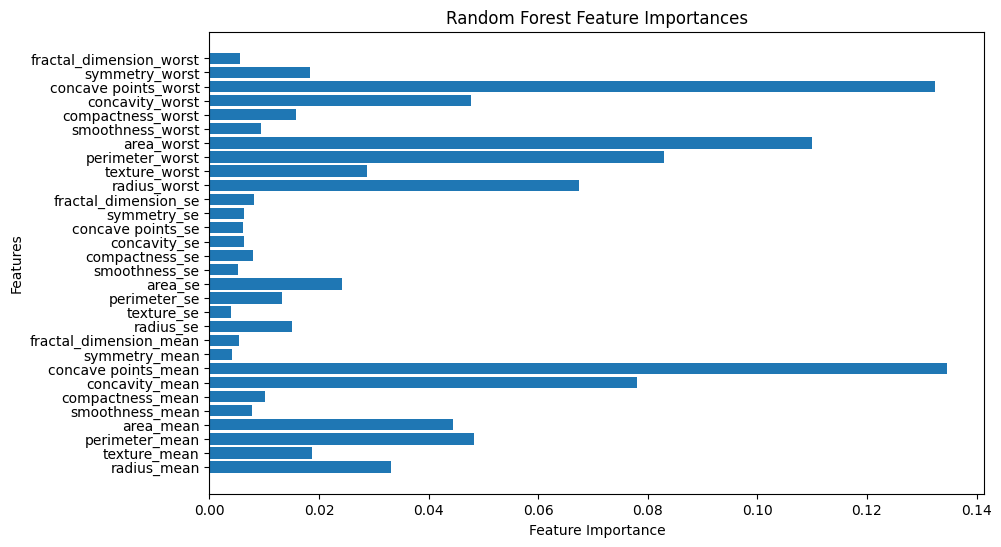

In [68]:
# Get feature importances from the best Random Forest estimator
feature_importances = best_rf_estimator.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(x.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()


# XGBoost

In [69]:
#random & grid
#before performance & after performance

In [70]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable to numerical labels (0: Benign, 1: Malignant)
le = LabelEncoder()
y = le.fit_transform(y)


In [71]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)

In [72]:
# XGBoost in Normal Form
xgb_model = XGBClassifier(random_state=42)

In [73]:
# Fit the model on the training data
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(xtest)

In [75]:
# Calculate accuracy
accuracy_xgb = accuracy_score(ytest, y_pred_xgb)

print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)

Accuracy using XGBoost in Normal Form: 0.9707602339181286


# XGBoost with Hyperparameter Optimization (Pre-Pruning) using Grid Search

In [76]:
# Define hyperparameters for XGBoost with pre-pruning
xgb_params_pre_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4]
}

In [77]:
# XGBoost with GridSearchCV for pre-pruning
xgb_grid_search_pre_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_pre_prune, cv=5)
xgb_grid_search_pre_prune.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]})

In [78]:
# Get the best XGBoost estimator from GridSearchCV for pre-pruning
best_xgb_estimator_pre_prune = xgb_grid_search_pre_prune.best_estimator_
     

# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune = best_xgb_estimator_pre_prune.predict(xtest)
     

# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_grid = accuracy_score(ytest, y_pred_xgb_pre_prune)
     

print("Best Parameters using GridSearchCV for XGBoost with Pre-Pruning:", xgb_grid_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Pre-Pruning: {'max_depth': 3, 'min_child_weight': 1}
Accuracy using XGBoost with Pre-Pruning: 0.9766081871345029


In [110]:
# Define hyperparameters for XGBoost with pre-pruning (Randomized Search)
''' xgb_params_pre_prune = {
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}'''
xgb_params_pre_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4]
}     

# XGBoost with RandomizedSearchCV for pre-pruning
xgb_random_search_pre_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_pre_prune, cv=5, n_iter=50, random_state=42)
xgb_random_search_pre_prune.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3, 4]},
                   random_state=42)

In [111]:
# Get the best XGBoost estimator from RandomizedSearchCV for pre-pruning
best_xgb_estimator_pre_prune_randomized = xgb_random_search_pre_prune.best_estimator_
     

# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune_randomized = best_xgb_estimator_pre_prune_randomized.predict(xtest)

     

# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_randomized = accuracy_score(ytest, y_pred_xgb_pre_prune_randomized)

print("Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning:", xgb_random_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_randomized)

Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning: {'min_child_weight': 1, 'max_depth': 3}
Accuracy using XGBoost with Pre-Pruning: 0.9766081871345029


# XGBoost with Hyperparameter Optimization (Post-Pruning) using Grid Search

In [112]:
# Define hyperparameters for XGBoost with post-pruning (Grid Search)
xgb_params_post_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [113]:
# XGBoost with GridSearchCV for post-pruning
xgb_grid_search_post_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_post_prune, cv=5)
xgb_grid_search_post_prune.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4],
                         'subsample': [0.7, 0.8, 0.9]})

In [83]:
# Get the best XGBoost estimator from GridSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_grid_search_post_prune.best_estimator_
# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)

# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_grid = accuracy_score(ytest, y_pred_xgb_post_prune)

print("Best Parameters using GridSearchCV for XGBoost with Post-Pruning:", xgb_grid_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Post-Pruning: {'colsample_bytree': 0.7, 'gamma': 0.4, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.9}
Accuracy using XGBoost with Post-Pruning: 0.9766081871345029


# XGBoost Hyperparameter Optimization (Post-Pruning) using Randomized Search.........

In [84]:
# Define hyperparameters for XGBoost with post-pruning
xgb_params_post_prune = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

# XGBoost with RandomizedSearchCV for post-pruning
xgb_random_search_post_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_post_prune, cv=5, n_iter=10, random_state=42)
xgb_random_search_post_prune.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]},
                   random_state=42)

In [85]:
# Get the best XGBoost estimator from RandomizedSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_random_search_post_prune.best_estimator_

# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)
     

# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_randomized = accuracy_score(ytest, y_pred_xgb_post_prune)
     

print("Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning:", xgb_random_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_randomized)
     

Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning: {'reg_lambda': 0.3, 'reg_alpha': 0.4, 'gamma': 0.4}
Accuracy using XGBoost with Post-Pruning: 0.9590643274853801


# Comparison Before Performance and After Performance

In [86]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)
print("Accuracy of XGBoost with Pre-Pruning (Grid Search):", accuracy_xgb_pre_prune_grid)
print("Accuracy of XGBoost with Pre-Pruning (Randomized Search):", accuracy_xgb_pre_prune_randomized)
print("Accuracy of XGBoost with Post-Pruning (Grid Search):", accuracy_xgb_post_prune_grid)
print("Accuracy of XGBoost with Post-Pruning (Randomized Search):", accuracy_xgb_post_prune_randomized)

Accuracy using XGBoost in Normal Form: 0.9707602339181286
Accuracy of XGBoost with Pre-Pruning (Grid Search): 0.9766081871345029
Accuracy of XGBoost with Pre-Pruning (Randomized Search): 0.9532163742690059
Accuracy of XGBoost with Post-Pruning (Grid Search): 0.9766081871345029
Accuracy of XGBoost with Post-Pruning (Randomized Search): 0.9590643274853801


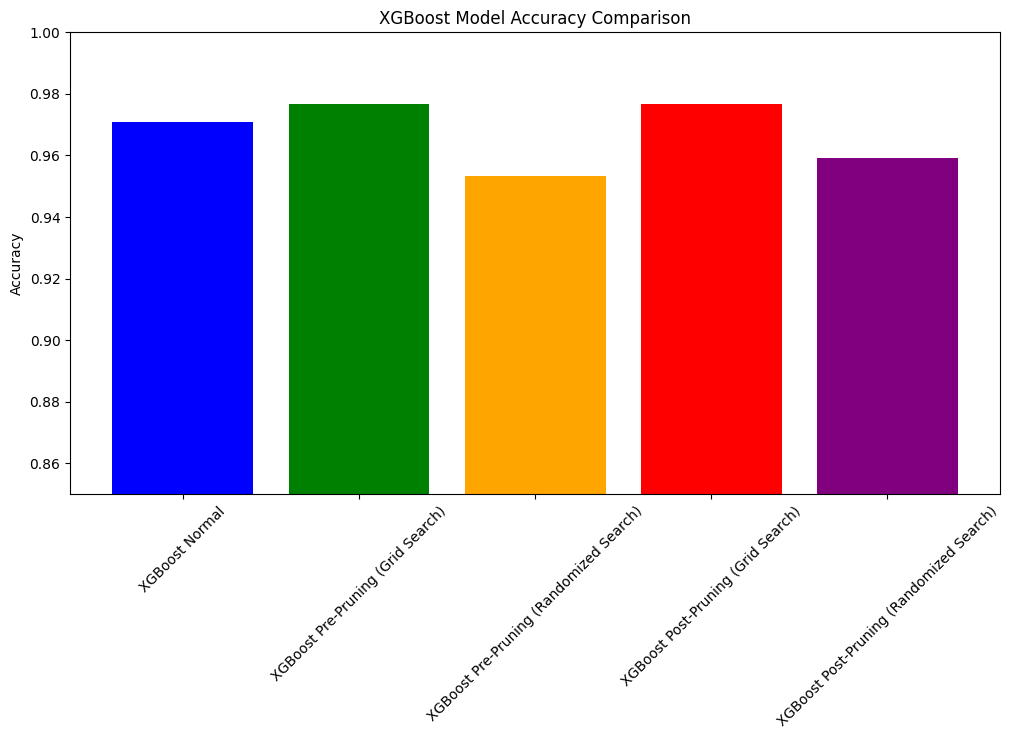

In [87]:
# Define the accuracies for different scenarios
accuracies = [accuracy_xgb,
              accuracy_xgb_pre_prune_grid,
              accuracy_xgb_pre_prune_randomized,
              accuracy_xgb_post_prune_grid,
              accuracy_xgb_post_prune_randomized]

# Define the labels for different scenarios
labels = ['XGBoost Normal',
          'XGBoost Pre-Pruning (Grid Search)',
          'XGBoost Pre-Pruning (Randomized Search)',
          'XGBoost Post-Pruning (Grid Search)',
          'XGBoost Post-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from xgboost import plot_tree

plt.figure(figsize=(20, 10)) #width, height
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.title("XGBoost Decision Tree (Normal Form)")
plt.show()

In [ ]:
# XGBoost with Pre-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Grid Search)")

In [ ]:
# XGBoost with Pre-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune_randomized, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Randomized Search)")

# XGBoost with Post-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Grid Search)")

# XGBoost with Post-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Randomized Search)")

plt.show()

# ADA Boost

In [92]:
#random & grid
#before performance & after performance

In [93]:
# AdaBoost in Normal
from sklearn.ensemble import AdaBoostClassifier

In [94]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)   

In [95]:
# Create and train the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [96]:
# Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(xtest)

In [97]:
# Calculate accuracy
accuracy_adaboost = accuracy_score(ytest, y_pred_adaboost)
print("Accuracy using AdaBoost in Normal Form:", accuracy_adaboost)

Accuracy using AdaBoost in Normal Form: 0.9766081871345029


In [98]:
# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [99]:
# Create and train the AdaBoost model with GridSearchCV for pre-pruning
adaboost_pre_prune_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                       param_grid=adaboost_params, cv=5)
adaboost_pre_prune_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=30,
                                                                   random_state=42)],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [100]:
# Get the best AdaBoost model
adaboost_pre_prune_best = adaboost_pre_prune_grid.best_estimator_

In [101]:
# Make predictions on the test data
y_pred_adaboost_pre_prune_grid = adaboost_pre_prune_best.predict(xtest)

In [102]:
# Calculate accuracy
accuracy_adaboost_pre_prune_grid = accuracy_score(ytest, y_pred_adaboost_pre_prune_grid)
print("Accuracy using AdaBoost with Pre-Pruning (GridSearchCV):", accuracy_adaboost_pre_prune_grid)

Accuracy using AdaBoost with Pre-Pruning (GridSearchCV): 0.9298245614035088


In [103]:
from scipy.stats import randint  # Import randint from scipy.stats

# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [104]:
# Create and train the AdaBoost model with RandomizedSearchCV for pre-pruning
adaboost_pre_prune_random = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                              param_distributions=adaboost_params,
                                              n_iter=100, cv=5, random_state=42)
adaboost_pre_prune_random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                                           DecisionTreeClassifier(max_depth=10,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=20,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=30,
                                                                                  random_state=42)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [105]:
# Get the best AdaBoost model
adaboost_pre_prune_random_best = adaboost_pre_prune_random.best_estimator_
     
# Make predictions on the test data
y_pred_adaboost_pre_prune_random = adaboost_pre_prune_random_best.predict(xtest)
     
# Calculate accuracy
accuracy_adaboost_pre_prune_random = accuracy_score(ytest, y_pred_adaboost_pre_prune_random)
print("Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV):", accuracy_adaboost_pre_prune_random)

Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV): 0.9298245614035088


In [106]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using ADABoost in Normal Form:", accuracy_adaboost)
print("Accuracy of ADABoost with Pre-Pruning (Grid Search):", accuracy_adaboost_pre_prune_grid)
print("Accuracy of ADABoost with Pre-Pruning (Randomized Search):", accuracy_adaboost_pre_prune_random)

Accuracy using ADABoost in Normal Form: 0.9766081871345029
Accuracy of ADABoost with Pre-Pruning (Grid Search): 0.9298245614035088
Accuracy of ADABoost with Pre-Pruning (Randomized Search): 0.9298245614035088


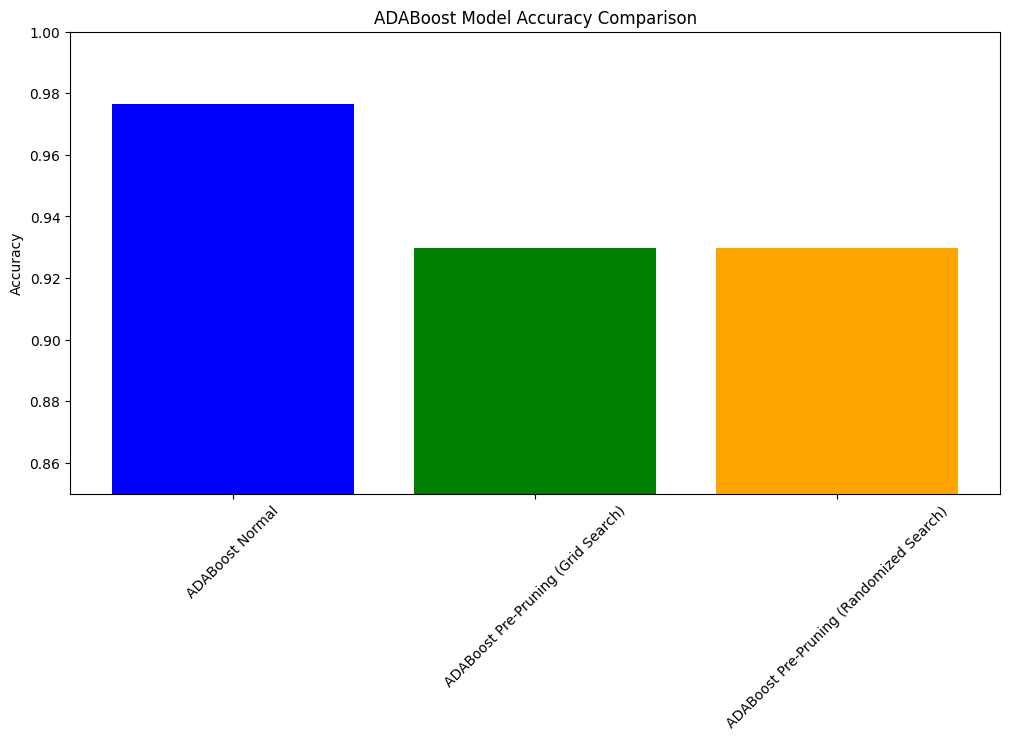

In [107]:
# Define the accuracies for different scenarios
accuracies = [accuracy_adaboost,
              accuracy_adaboost_pre_prune_grid,
              accuracy_adaboost_pre_prune_random]

# Define the labels for different scenarios
labels = ['ADABoost Normal',
          'ADABoost Pre-Pruning (Grid Search)',
          'ADABoost Pre-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('ADABoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()

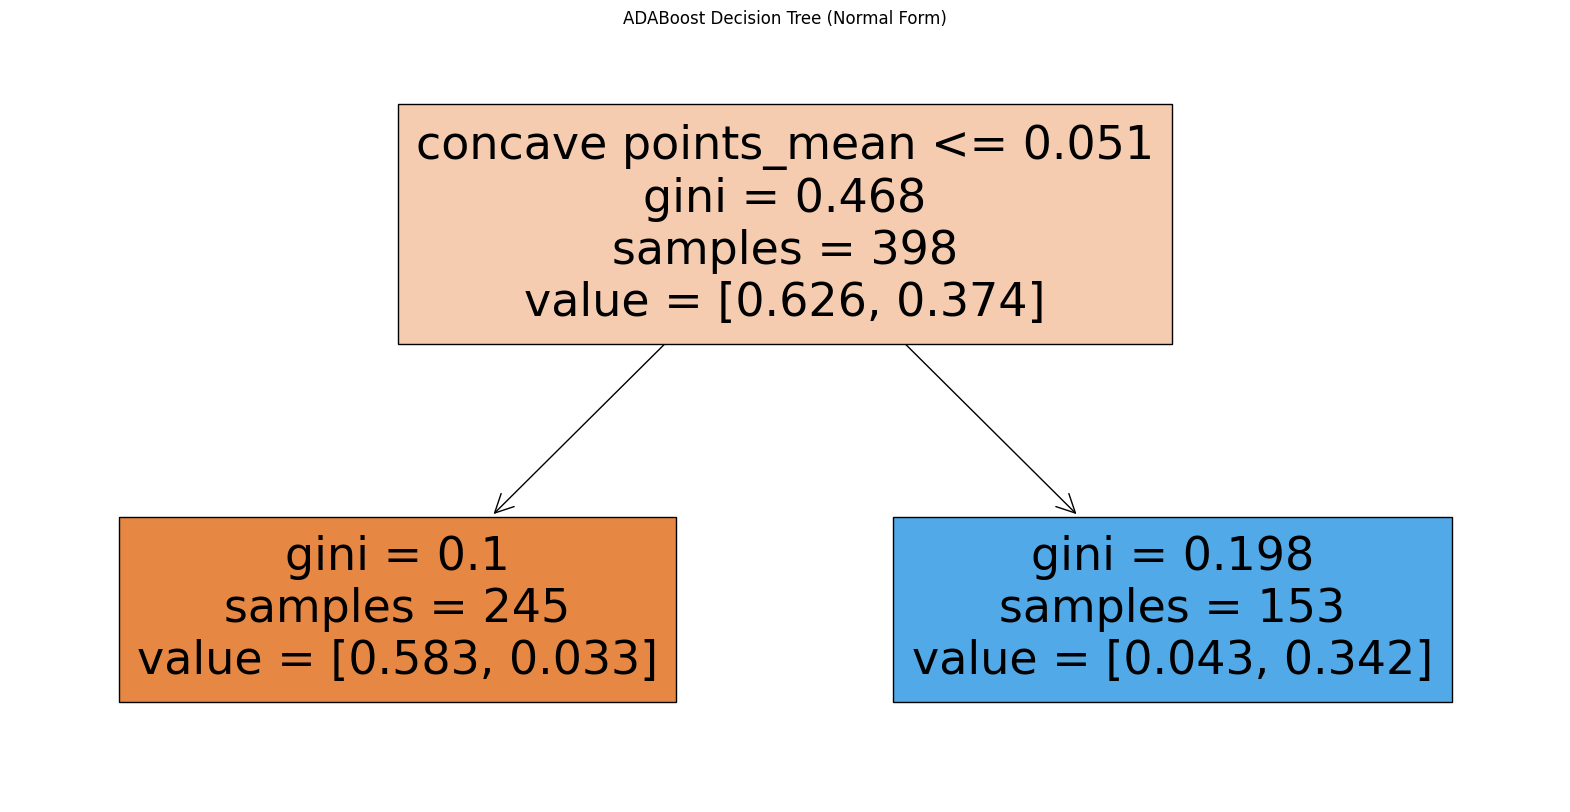

In [108]:
from sklearn.tree import plot_tree

# ADABoost in Normal Form
# Plot the tree of the ADABoost model
plt.figure(figsize=(20, 10))
plot_tree(adaboost_model.estimators_[0], filled=True, feature_names=x.columns)
plt.title("ADABoost Decision Tree (Normal Form)")
plt.show()